# Aviation Problem Exploratory Stage

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sb 
from datetime import datetime
# import plotly.graph_objects as go
# import plotly.express as px

In [4]:
Data = pd.read_excel('AviationData.xlsx')
Data.head()

Event.Id Event.Date       Location        Country   Latitude  \
0  20200102X82407 2019-12-31        Elk, CA  United States  39.128611   
1  20191231X83852 2019-12-31     OLATHE, KS  United States  38.846111   
2  20200102X54844 2019-12-31  Fairbanks, AK  United States  64.666945   
3  20191230X91852 2019-12-30   GRANBURY, TX  United States  32.365556   
4  20191228X62945 2019-12-28   Missoula, MT  United States        NaN   

    Longitude Injury.Severity Aircraft.Damage Aircraft.Category  \
0 -123.715833       Non-Fatal     Substantial          Airplane   
1  -94.736111        Fatal(2)       Destroyed          Airplane   
2 -148.133334       Non-Fatal     Substantial          Airplane   
3  -97.645000       Non-Fatal     Substantial          Airplane   
4         NaN     Unavailable     Substantial               NaN   

  Registration.Number  ...   FAR.Description Purpose.of.Flight  \
0              N7095M  ...  General Aviation          Personal   
1              N602TF  ...  General Aviation          Personal   
2              N4667C  ...  General Aviation          Personal   
3              N519RV  ...  General Aviation          Personal   
4              N4476B  ...   Public Aircraft               NaN   

  Total.Fatal.Injuries  Total.Serious.Injuries Total.Minor.Injuries  \
0                  NaN                     NaN                  NaN   
1                  2.0                     NaN                  NaN   
2                  NaN                     NaN                  NaN   
3                  NaN                     NaN                  NaN   
4                  NaN                     NaN                  NaN   

  Total.Uninjured Total.Injured  Total.Passenger  Weather.Condition  \
0             1.0           0.0              1.0                VMC   
1             2.0           2.0              4.0                VMC   
2             2.0           0.0              2.0                NaN   
3             1.0           0.0              1.0                NaN   
4             NaN           NaN              NaN                NaN   

   Broad.Phase.of.Flight  
0                TAKEOFF  
1                TAKEOFF  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 25 columns]

In [16]:
regis = pd.DataFrame(Data["Registration.Number"])
regis.head()

Registration.Number
0              N7095M
1              N602TF
2              N4667C
3              N519RV
4              N4476B

In [18]:
from tabulate import tabulate

In [20]:
regis = regis.reset_index()
regis.head(2)

index Registration.Number
0      0              N7095M
1      1              N602TF

In [21]:
regis = regis.rename(columns={'index':'Number'})
regis.head(2)

Number Registration.Number
0       0              N7095M
1       1              N602TF

In [26]:
regis.dtypes

Number                  int64
Registration.Number    object
dtype: object

In [33]:
print(tabulate(regis, showindex=True, headers=regis.columns, colalign = {'numalign':'Left'}))

         Number  Registration.Number
-----  --------  ---------------------
0             0  N7095M
1             1  N602TF
2             2  N4667C
3             3  N519RV
4             4  N4476B
5             5  N42CV
6             6  N663SF
7             7  nan
8             8  N924PA
9             9  N5057Z
10           10  N601FL
11           11  N91WW
12           12  N695AP
13           13  N1107C
14           14  N5406R
15           15  N9566S
16           16  N961GG
17           17  N160RW
18           18  N4098N
19           19  N719JS
20           20  N2224H
21           21  N182EF
22           22  N2822F
23           23  N4602B
24           24  N914AR
25           25  N5557Q
26           26  N47EB
27           27  N79LP
28           28  N408P
29           29  N52458
30           30  N45606
31           31  N864SC
32           32  N2876Q
33           33  N469RJ
34           34  N558PU
35           35  N991WS
36           36  N6678P
37           37  N52CY
38           38  N56K

In [3]:
print("Data type : ", type(Data))
print("Data dims : ", Data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (84262, 25)


In [4]:
Data.columns

Index(['Event.Id', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Injury.Severity', 'Aircraft.Damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.Flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Total.Injured',
       'Total.Passenger', 'Weather.Condition', 'Broad.Phase.of.Flight'],
      dtype='object')

In [5]:
clean = pd.DataFrame(Data[["Event.Date","Location","Country","Aircraft.Damage","Make",\
                           "Model", "Amateur.Built","Number.of.Engines",\
                           "Total.Uninjured","Total.Injured","Total.Passenger",\
                           "Weather.Condition","Broad.Phase.of.Flight"]]).dropna()
clean['Year'] = clean['Event.Date'].dt.year
clean.reset_index
clean.head()

Event.Date       Location        Country Aircraft.Damage    Make   Model  \
0  2019-12-31        Elk, CA  United States     Substantial  Cessna     175   
1  2019-12-31     OLATHE, KS  United States       Destroyed  Mooney    M20S   
5  2019-12-28  LAFAYETTE, LA  United States       Destroyed   Piper  PA 31T   
6  2019-12-25   Headland, AL  United States     Substantial    Bell     407   
14 2019-12-18   Harrison, OH  United States     Substantial  Cessna     172   

   Amateur.Built  Number.of.Engines  Total.Uninjured  Total.Injured  \
0             No                1.0              1.0            0.0   
1             No                1.0              2.0            2.0   
5             No                2.0              0.0            9.0   
6             No                1.0              2.0            1.0   
14            No                1.0              2.0            0.0   

    Total.Passenger Weather.Condition Broad.Phase.of.Flight  Year  
0               1.0               VMC               TAKEOFF  2019  
1               4.0               VMC               TAKEOFF  2019  
5               9.0               IMC               TAKEOFF  2019  
6               3.0               VMC              APPROACH  2019  
14              2.0               VMC               LANDING  2019

In [6]:
clean.describe()

Number.of.Engines  Total.Uninjured  Total.Injured  Total.Passenger  \
count       72586.000000     72586.000000   72586.000000     72586.000000   
mean            1.124321         2.746384       0.878599         3.624983   
std             0.400766        17.772921       3.164386        18.159089   
min             0.000000         0.000000       0.000000         0.000000   
25%             1.000000         0.000000       0.000000         1.000000   
50%             1.000000         1.000000       0.000000         2.000000   
75%             1.000000         2.000000       1.000000         2.000000   
max             4.000000       699.000000     283.000000       699.000000   

               Year  
count  72586.000000  
mean    1996.696085  
std       10.574890  
min     1948.000000  
25%     1987.000000  
50%     1995.000000  
75%     2005.000000  
max     2019.000000

In [7]:
print(clean.dtypes)

Event.Date               datetime64[ns]
Location                         object
Country                          object
Aircraft.Damage                  object
Make                             object
Model                            object
Amateur.Built                    object
Number.of.Engines               float64
Total.Uninjured                 float64
Total.Injured                   float64
Total.Passenger                 float64
Weather.Condition                object
Broad.Phase.of.Flight            object
Year                              int64
dtype: object


# Exploratory and Data Preprocessing

## 0. Exploring Country

In [8]:
print(clean["Country"].unique())

['United States' 'Bahamas' 'Brazil' 'Germany' 'South Africa' 'Italy'
 'Dominican Republic' 'Chile' 'Mexico' 'Austria' 'Honduras' 'Unknown'
 'Greenland' 'United Arab Emirates' 'Australia' 'Ecuador' 'Costa Rica'
 'Colombia' 'Belgium' 'Canada' 'United Kingdom' 'Venezuela' 'Kazakhstan'
 'Guyana' 'Suriname' 'Portugal' 'Argentina' 'Russia' 'Panama' 'Peru'
 'Spain' 'Macedonia' 'France' 'Kiribati' 'Japan' 'Finland' 'Ireland'
 'Uruguay' 'Switzerland' 'Afghanistan' 'Papua New Guinea' 'American Samoa'
 'Saudi Arabia' 'Iraq' 'Solomon Islands' 'Antarctica'
 'Northern Mariana Islands' 'St Kitts And Nevis' 'Philippines'
 'El Salvador' 'Marshall Islands' 'Taiwan' 'Haiti' 'Jamaica' 'India'
 'Mali' 'Mauritius' 'Antigua And Barbuda' 'Netherlands'
 'Federated States Of Micronesia' 'Cuba' 'Guatemala' 'Bermuda' 'Iceland']


In [9]:
print("Number of Country Types :", len(clean["Country"].unique()))
print("Total data:", clean["Country"].count() + 1)
clean["Country"].value_counts().head()

Number of Country Types : 64
Total data: 72587


United States    72406
Bahamas             24
Brazil              18
Canada              12
Colombia            10
Name: Country, dtype: int64

#### Conclusion is: Other countries is deemed irrelevant as most 99% data is USA's! Remove!

In [10]:
clean = clean[clean.Country == "United States"]
clean.describe()

Number.of.Engines  Total.Uninjured  Total.Injured  Total.Passenger  \
count       72406.000000     72406.000000   72406.000000     72406.000000   
mean            1.123263         2.721377       0.873615         3.594992   
std             0.398687        17.611644       3.157869        17.997014   
min             0.000000         0.000000       0.000000         0.000000   
25%             1.000000         0.000000       0.000000         1.000000   
50%             1.000000         1.000000       0.000000         2.000000   
75%             1.000000         2.000000       1.000000         2.000000   
max             4.000000       699.000000     283.000000       699.000000   

               Year  
count  72406.000000  
mean    1996.669157  
std       10.558223  
min     1948.000000  
25%     1987.000000  
50%     1995.000000  
75%     2005.000000  
max     2019.000000

### 1. Obtain United States "States"

In [11]:
clean["States"] = clean.Location.str[-2:]
col_list = list(clean)
col_list[13], col_list[1] = col_list[1], col_list[13]
col_list[14], col_list[2] = col_list[2], col_list[14] 
clean = clean.reindex(columns = col_list)
clean = clean.drop(columns = ["Location","Country"]) #Not necessary but okay
clean.head()

Event.Date  Year States Aircraft.Damage    Make   Model Amateur.Built  \
0  2019-12-31  2019     CA     Substantial  Cessna     175            No   
1  2019-12-31  2019     KS       Destroyed  Mooney    M20S            No   
5  2019-12-28  2019     LA       Destroyed   Piper  PA 31T            No   
6  2019-12-25  2019     AL     Substantial    Bell     407            No   
14 2019-12-18  2019     OH     Substantial  Cessna     172            No   

    Number.of.Engines  Total.Uninjured  Total.Injured  Total.Passenger  \
0                 1.0              1.0            0.0              1.0   
1                 1.0              2.0            2.0              4.0   
5                 2.0              0.0            9.0              9.0   
6                 1.0              2.0            1.0              3.0   
14                1.0              2.0            0.0              2.0   

   Weather.Condition Broad.Phase.of.Flight  
0                VMC               TAKEOFF  
1                VMC               TAKEOFF  
5                IMC               TAKEOFF  
6                VMC              APPROACH  
14               VMC               LANDING

### 2. Find out about the states!

In [12]:
print("Number of States:", len(clean["States"].unique()))

print("Top 10 States:","\n",clean["States"].value_counts().nlargest(10))
print("Total data:", clean["States"].count() + 1)

Number of States: 59
Top 10 States: 
 CA    7901
AK    5142
TX    5114
FL    5092
AZ    2448
CO    2370
WA    2323
MI    1821
IL    1739
GA    1738
Name: States, dtype: int64
Total data: 72407


Number of States: 50
Total data: 72210


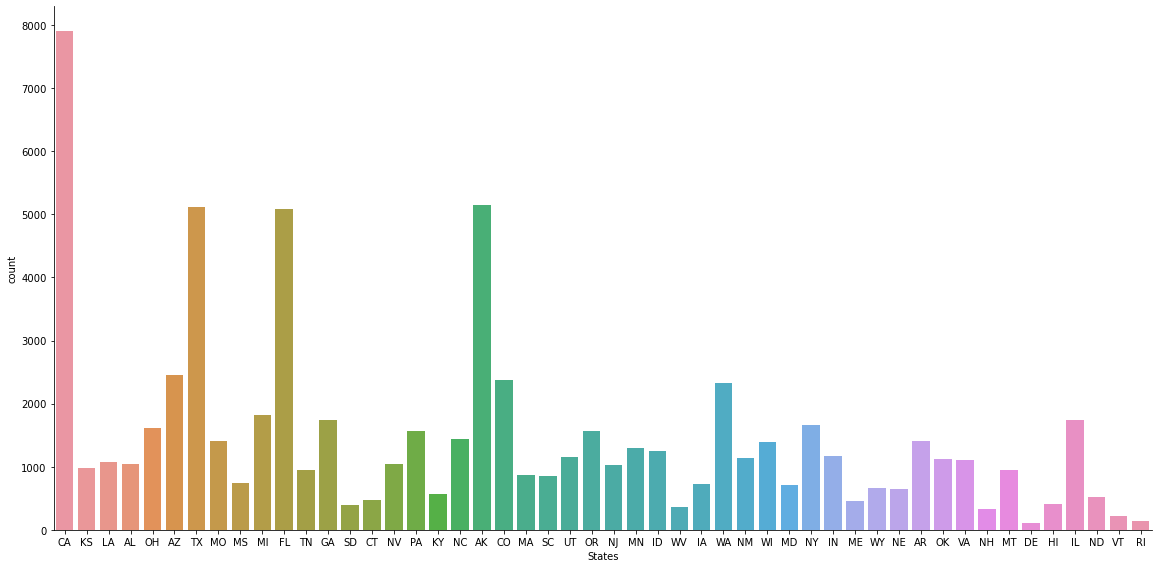

In [13]:
rem = ["PR","GM","DC","GU","VI","MP","AO","PO","UN"]
cond = [0,0,0,0,0,0,0,0,0]
#Make iterations for desired conditions
for x in range (9):
    cond[x] = clean.States != rem[x]
clean = clean[cond[0] & cond[1] & cond[2] & cond[3] & cond[4] & cond[5] & cond[6] & cond[7] & cond[8]]

print("Number of States:", len(clean["States"].unique()))
print("Total data:", clean["States"].count() + 1)

sb.catplot(x = "States", data = clean, kind = "count", height=8, aspect=2)

#### Remove uneccessary makes!

In [14]:
print("Number of Make Types :", len(clean["Make"].unique()))

print(clean["Make"].value_counts().nlargest(10))
print("Total data:", clean["Make"].count() + 1)

Number of Make Types : 6908
Cessna         23953
Piper          13074
Beech           4642
Bell            3039
Grumman         1537
Mooney          1183
Robinson        1111
Boeing           914
Hughes           780
Air Tractor      748
Name: Make, dtype: int64
Total data: 72210


In [15]:
explore_make = pd.DataFrame(clean["Make"].value_counts().rename_axis('Make').reset_index(name='Counts'))
def f(x):
    if explore_make['Counts'].iloc[x] < explore_make['Counts'].iloc[9]:
        return explore_make['Make'].iloc[x]

for x in range (len(clean["Make"].unique())):
    clean.Make[clean["Make"] == f(x)] = "Others"


C:\Users\MIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2. Grouping States based on 9 Divisions

Mapping each states to their respective division

In [16]:
remake = clean[clean["Make"] != 'Others']

In [17]:
remake.describe()

Year  Number.of.Engines  Total.Uninjured  Total.Injured  \
count  50981.000000       50981.000000     50981.000000   50981.000000   
mean    1995.668818           1.131853         2.378769       0.832545   
std       10.289829           0.364728        15.997651       2.382324   
min     1962.000000           0.000000         0.000000       0.000000   
25%     1987.000000           1.000000         0.000000       0.000000   
50%     1994.000000           1.000000         1.000000       0.000000   
75%     2003.000000           1.000000         2.000000       1.000000   
max     2019.000000           4.000000       699.000000     230.000000   

       Total.Passenger  
count     50981.000000  
mean          3.211314  
std          16.257191  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           2.000000  
max         699.000000

In [18]:
div = remake["States"].unique()
div = div.tolist()
print(div)

['CA', 'KS', 'LA', 'AL', 'OH', 'AZ', 'TX', 'MS', 'FL', 'CT', 'NV', 'MO', 'AK', 'CO', 'MA', 'KY', 'GA', 'NJ', 'MN', 'ID', 'WV', 'IA', 'NM', 'NC', 'TN', 'NY', 'SD', 'IN', 'PA', 'ME', 'WY', 'OR', 'AR', 'OK', 'MD', 'UT', 'MI', 'NH', 'MT', 'WA', 'DE', 'HI', 'NE', 'IL', 'VA', 'ND', 'WI', 'SC', 'VT', 'RI']


In [19]:
#Grouping to 9 divisions!
todiv={}
for i in range(0,len(div)):
    if i==10 or i==15 or i==30 or i==38 or i==49 or i==50:
        todiv[div[i]]="NWED"
    elif i==18 or i==26 or i==29:
        todiv[div[i]]="MATL"
    elif i==5 or i==28 or i==37 or i==44 or i==47:
        todiv[div[i]]="ENC"
    elif i==2 or i==12 or i==19 or i==22 or i==27 or i==43 or i==46:
        todiv[div[i]]="WNC"
    elif i==9 or i==17 or i==21 or i==24 or i==34 or i==41 or i==45 or i==48:
        todiv[div[i]]="SATL"
    elif i==4 or i==8 or i==16 or i==25:
        todiv[div[i]]="ESC"
    elif i==3 or i==7 or i==33 or i==34:
        todiv[div[i]]="WSC"
    elif i==6 or i==11 or i==14 or i==20 or i==23 or i==31 or i==36 or i==39:
        todiv[div[i]]="MTN"
    else:
        todiv[div[i]]="PAC"
        

In [20]:
todiv

{'CA': 'PAC',
 'KS': 'PAC',
 'LA': 'WNC',
 'AL': 'WSC',
 'OH': 'ESC',
 'AZ': 'ENC',
 'TX': 'MTN',
 'MS': 'WSC',
 'FL': 'ESC',
 'CT': 'SATL',
 'NV': 'NWED',
 'MO': 'MTN',
 'AK': 'WNC',
 'CO': 'PAC',
 'MA': 'MTN',
 'KY': 'NWED',
 'GA': 'ESC',
 'NJ': 'SATL',
 'MN': 'MATL',
 'ID': 'WNC',
 'WV': 'MTN',
 'IA': 'SATL',
 'NM': 'WNC',
 'NC': 'MTN',
 'TN': 'SATL',
 'NY': 'ESC',
 'SD': 'MATL',
 'IN': 'WNC',
 'PA': 'ENC',
 'ME': 'MATL',
 'WY': 'NWED',
 'OR': 'MTN',
 'AR': 'PAC',
 'OK': 'WSC',
 'MD': 'SATL',
 'UT': 'PAC',
 'MI': 'MTN',
 'NH': 'ENC',
 'MT': 'NWED',
 'WA': 'MTN',
 'DE': 'PAC',
 'HI': 'SATL',
 'NE': 'PAC',
 'IL': 'WNC',
 'VA': 'ENC',
 'ND': 'SATL',
 'WI': 'WNC',
 'SC': 'ENC',
 'VT': 'SATL',
 'RI': 'NWED'}

Adding a new feature column called "Division" which represents the States

In [21]:
remake["Division"]= remake["States"].map(todiv)

C:\Users\MIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
remake.head()

Event.Date  Year States Aircraft.Damage    Make   Model Amateur.Built  \
0  2019-12-31  2019     CA     Substantial  Cessna     175            No   
1  2019-12-31  2019     KS       Destroyed  Mooney    M20S            No   
5  2019-12-28  2019     LA       Destroyed   Piper  PA 31T            No   
6  2019-12-25  2019     AL     Substantial    Bell     407            No   
14 2019-12-18  2019     OH     Substantial  Cessna     172            No   

    Number.of.Engines  Total.Uninjured  Total.Injured  Total.Passenger  \
0                 1.0              1.0            0.0              1.0   
1                 1.0              2.0            2.0              4.0   
5                 2.0              0.0            9.0              9.0   
6                 1.0              2.0            1.0              3.0   
14                1.0              2.0            0.0              2.0   

   Weather.Condition Broad.Phase.of.Flight Division  
0                VMC               TAKEOFF      PAC  
1                VMC               TAKEOFF      PAC  
5                IMC               TAKEOFF      WNC  
6                VMC              APPROACH      WSC  
14               VMC               LANDING      ESC

Number of Division: 9
MTN     10366
PAC     10165
WNC      9397
ESC      7040
ENC      4329
SATL     3614
NWED     2368
WSC      2157
MATL     1545
Name: Division, dtype: int64
Total data: 50982


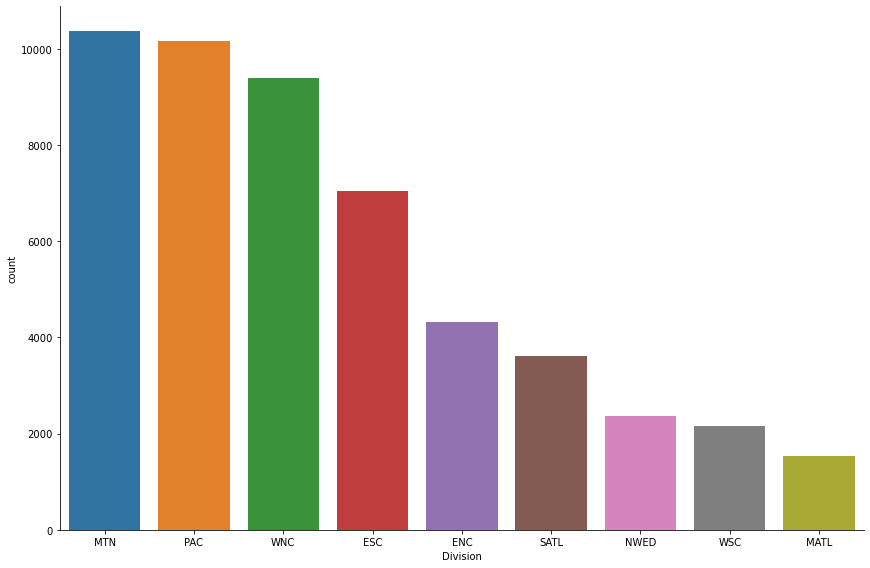

In [23]:
print("Number of Division:", len(remake["Division"].unique()))
print(remake["Division"].value_counts())
print("Total data:", remake["Division"].count() + 1)

sb.catplot(x = "Division", data = remake, kind = "count", height=8, aspect=1.5, order = ["MTN","PAC","WNC","ESC",\
                                                                                        "ENC","SATL","NWED","WSC",\
                                                                                         "MATL"])

In [24]:
#Refining the dataframe...
col_list = list(remake)
col_list[13], col_list[2] = col_list[2], col_list[13]
remake = remake.reindex(columns = col_list)
remake = remake.drop(["Event.Date","States"],axis=1)
remake.head()

Year Division Aircraft.Damage    Make   Model Amateur.Built  \
0   2019      PAC     Substantial  Cessna     175            No   
1   2019      PAC       Destroyed  Mooney    M20S            No   
5   2019      WNC       Destroyed   Piper  PA 31T            No   
6   2019      WSC     Substantial    Bell     407            No   
14  2019      ESC     Substantial  Cessna     172            No   

    Number.of.Engines  Total.Uninjured  Total.Injured  Total.Passenger  \
0                 1.0              1.0            0.0              1.0   
1                 1.0              2.0            2.0              4.0   
5                 2.0              0.0            9.0              9.0   
6                 1.0              2.0            1.0              3.0   
14                1.0              2.0            0.0              2.0   

   Weather.Condition Broad.Phase.of.Flight  
0                VMC               TAKEOFF  
1                VMC               TAKEOFF  
5                IMC               TAKEOFF  
6                VMC              APPROACH  
14               VMC               LANDING

## A. Exploratory - Make

### 1a. TOP 10 Make Cat Plot

Number of Make Types : 10
Cessna         23953
Piper          13074
Beech           4642
Bell            3039
Grumman         1537
Mooney          1183
Robinson        1111
Boeing           914
Hughes           780
Air Tractor      748
Name: Make, dtype: int64
Total data: 50982


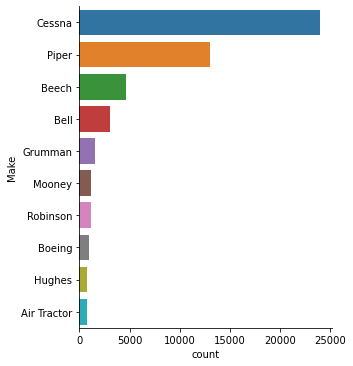

In [25]:
print("Number of Make Types :", len(remake["Make"].unique()))

print(remake["Make"].value_counts())
print("Total data:", remake["Make"].count() + 1)
sb.catplot(y = "Make", data = remake, kind = "count", order = ["Cessna","Piper","Beech",\
                                                              "Bell","Grumman","Mooney",\
                                                              "Robinson","Boeing",\
                                                              "Hughes","Air Tractor"])

### Grouping based on Make!

In [26]:
remake.describe()

Year  Number.of.Engines  Total.Uninjured  Total.Injured  \
count  50981.000000       50981.000000     50981.000000   50981.000000   
mean    1995.668818           1.131853         2.378769       0.832545   
std       10.289829           0.364728        15.997651       2.382324   
min     1962.000000           0.000000         0.000000       0.000000   
25%     1987.000000           1.000000         0.000000       0.000000   
50%     1994.000000           1.000000         1.000000       0.000000   
75%     2003.000000           1.000000         2.000000       1.000000   
max     2019.000000           4.000000       699.000000     230.000000   

       Total.Passenger  
count     50981.000000  
mean          3.211314  
std          16.257191  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           2.000000  
max         699.000000

In [27]:
m = remake["Make"].unique()
m = m.tolist()
split_make=[]
for i in range(len(m)):
    split_make.append(remake[remake["Make"]==m[i]])
for i in range (len(m)):
    split_make[i] = split_make[i].reset_index()

In [28]:
split_make[1].head()

index  Year Division Aircraft.Damage    Make Model Amateur.Built  \
0      1  2019      PAC       Destroyed  Mooney  M20S            No   
1     81  2019      ESC     Substantial  Mooney  M20J            No   
2    136  2019      WNC     Substantial  Mooney  M20J            No   
3    141  2019      MTN       Destroyed  Mooney  M20A            No   
4    311  2019      ENC     Substantial  Mooney  M20M            No   

   Number.of.Engines  Total.Uninjured  Total.Injured  Total.Passenger  \
0                1.0              2.0            2.0              4.0   
1                1.0              0.0            2.0              2.0   
2                1.0              0.0            1.0              1.0   
3                1.0              0.0            2.0              2.0   
4                1.0              2.0            0.0              2.0   

  Weather.Condition Broad.Phase.of.Flight  
0               VMC               TAKEOFF  
1               VMC              APPROACH  
2               VMC           MANEUVERING  
3               VMC               UNKNOWN  
4               VMC               TAKEOFF

### 1b. Grouping TOP 5 Make per Division x9

In [29]:
p = remake["Division"].unique()
p = p.tolist()

In [30]:
data_split=[]
for i in range(0,len(p)):
    data_split.append(remake[remake["Division"]==p[i]])

In [31]:
for x in range(len(p)):
    print("Division:",p[x])
    print(data_split[x]["Make"].value_counts().nlargest(5))
    print("Total data:", data_split[x]["Make"].count() + 1)
    print()

Division: PAC
Cessna     4679
Piper      2225
Beech      1017
Bell        719
Grumman     457
Name: Make, dtype: int64
Total data: 10166

Division: WNC
Cessna     4587
Piper      2841
Beech       584
Bell        499
Grumman     278
Name: Make, dtype: int64
Total data: 9398

Division: WSC
Cessna         1014
Piper           446
Beech           234
Bell            165
Air Tractor      87
Name: Make, dtype: int64
Total data: 2158

Division: ESC
Cessna    3265
Piper     1949
Beech      677
Bell       335
Mooney     181
Name: Make, dtype: int64
Total data: 7041

Division: ENC
Cessna    2003
Piper     1220
Beech      436
Bell       195
Mooney     134
Name: Make, dtype: int64
Total data: 4330

Division: MTN
Cessna     4958
Piper      2411
Beech       980
Bell        632
Grumman     292
Name: Make, dtype: int64
Total data: 10367

Division: SATL
Cessna     1567
Piper      1004
Beech       339
Bell        215
Grumman     113
Name: Make, dtype: int64
Total data: 3615

Division: NWED
Cessna    114

## B. Exploring Weather Condition (WC)

### WC - Use Remake Dataset

In [32]:
print("Number of WC Types :", len(remake["Weather.Condition"].unique()))

print(remake["Weather.Condition"].value_counts())
print("Total data:", remake["Weather.Condition"].count() + 1)

Number of WC Types : 3
VMC    46373
IMC     4194
UNK      414
Name: Weather.Condition, dtype: int64
Total data: 50982


In [33]:
rexplore_wc = pd.DataFrame(remake["Weather.Condition"].value_counts().rename_axis('Weather.Condition').reset_index(name='Counts'))
labels = rexplore_wc["Weather.Condition"]
values = rexplore_wc["Counts"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, title_text =\
                             "Pie Chart of Weather Condition Based on Top 5 Makes",\
                            textfont_size=None,titleposition="top center",)])
fig.show()

## C. Exploring Broad of Phase

### 1. Remake B.o.P (All)

In [34]:
print(remake["Broad.Phase.of.Flight"].unique())

['TAKEOFF' 'APPROACH' 'LANDING' 'CRUISE' 'MANEUVERING' 'CLIMB' 'STANDING'
 'DESCENT' 'UNKNOWN' 'GO-AROUND' 'TAXI' 'OTHER']


###### We want to combine unknown and others together.

In [35]:
remake["Broad.Phase.of.Flight"][remake["Broad.Phase.of.Flight"] == "UNKNOWN"] = "OTHER"
print(remake["Broad.Phase.of.Flight"].unique())

['TAKEOFF' 'APPROACH' 'LANDING' 'CRUISE' 'MANEUVERING' 'CLIMB' 'STANDING'
 'DESCENT' 'OTHER' 'GO-AROUND' 'TAXI']


C:\Users\MIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Number of Broad Phase of Flight Types : 11
LANDING        14450
TAKEOFF        10217
CRUISE          7704
MANEUVERING     6206
APPROACH        5340
TAXI            1666
CLIMB           1489
DESCENT         1479
GO-AROUND       1316
STANDING         666
OTHER            448
Name: Broad.Phase.of.Flight, dtype: int64
Total data: 50982


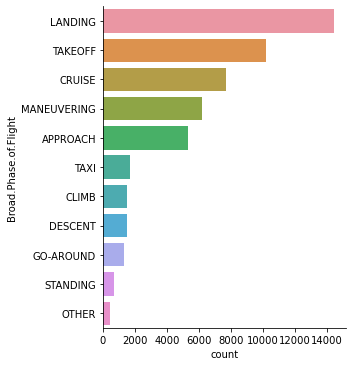

In [36]:
print("Number of Broad Phase of Flight Types :", len(remake["Broad.Phase.of.Flight"].unique()))
print(remake["Broad.Phase.of.Flight"].value_counts())
print("Total data:", remake["Broad.Phase.of.Flight"].count() + 1)
sb.catplot(y = "Broad.Phase.of.Flight", data = remake, kind = "count",\
          order = ["LANDING","TAKEOFF","CRUISE","MANEUVERING","APPROACH","TAXI","CLIMB",\
                  "DESCENT","GO-AROUND","STANDING","OTHER"])

### 2. B.o.P based on Makes

In [37]:
for x in range(len(split_make)):
    print(split_make[x]["Make"].iloc[0])
    print(split_make[x]["Broad.Phase.of.Flight"].value_counts())
    print("Total data:", split_make[x]["Broad.Phase.of.Flight"].count() + 1)
    print()


Cessna
LANDING        7959
TAKEOFF        4585
CRUISE         3512
APPROACH       2440
MANEUVERING    2079
TAXI            872
GO-AROUND       708
DESCENT         705
CLIMB           614
STANDING        268
UNKNOWN         176
OTHER            35
Name: Broad.Phase.of.Flight, dtype: int64
Total data: 23954

Mooney
LANDING        272
CRUISE         254
TAKEOFF        244
APPROACH       151
CLIMB           84
MANEUVERING     66
DESCENT         41
GO-AROUND       37
TAXI            18
UNKNOWN         10
STANDING         6
Name: Broad.Phase.of.Flight, dtype: int64
Total data: 1184

Piper
LANDING        3566
TAKEOFF        2912
CRUISE         2106
APPROACH       1469
MANEUVERING    1241
CLIMB           414
TAXI            395
DESCENT         372
GO-AROUND       342
STANDING        135
UNKNOWN         102
OTHER            20
Name: Broad.Phase.of.Flight, dtype: int64
Total data: 13075

Bell
MANEUVERING    944
LANDING        567
CRUISE         507
TAKEOFF        491
APPROACH       222
CLIMB    

**Landing:** Cessna, Mooney, Piper, Beech | **Maneuvering:** Bell, Grumman, Robinson, Air Tractor, Hughes

## C. Exploring Aircraft Damage

### 1. Remake A.D.

In [38]:
print(remake["Aircraft.Damage"].unique())

['Substantial' 'Destroyed' 'Minor']


Number of Aircraft Damage Types : 3
Substantial    39091
Destroyed      10826
Minor           1064
Name: Aircraft.Damage, dtype: int64
Total data: 50982


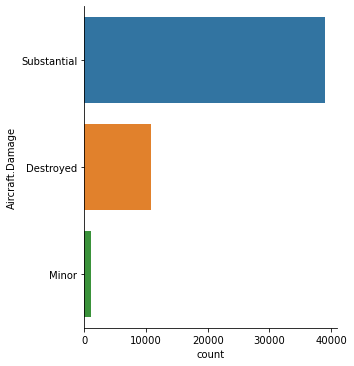

In [39]:
print("Number of Aircraft Damage Types :", len(remake["Aircraft.Damage"].unique()))

print(remake["Aircraft.Damage"].value_counts())
print("Total data:", remake["Aircraft.Damage"].count() + 1)
sb.catplot(y = "Aircraft.Damage", data = remake, kind = "count")

## D. Exploring Total Injuries

### 1. Total Injuries - Overall based on Year - Clean

In [40]:
frames = [clean["Year"],clean["Total.Injured"],clean["Total.Uninjured"],\
         clean["Total.Passenger"]]
TI_data = pd.concat(frames, axis=1)
TI_data.head()

Year  Total.Injured  Total.Uninjured  Total.Passenger
0   2019            0.0              1.0              1.0
1   2019            2.0              2.0              4.0
5   2019            9.0              0.0              9.0
6   2019            1.0              2.0              3.0
14  2019            0.0              2.0              2.0

In [41]:
TI_grp = TI_data.groupby(["Year"]).sum()
TI_grp = TI_grp[6:] ##This removes irrelevant years, i.e. 1948, 1962, 1974, etc.
TI_grp = TI_grp.reset_index()
TI_grp.head()

Year  Total.Injured  Total.Uninjured  Total.Passenger
0  1982         3087.0           6776.0           9863.0
1  1983         2851.0          12093.0          14944.0
2  1984         2787.0           7748.0          10535.0
3  1985         2883.0           7537.0          10420.0
4  1986         2537.0           5613.0           8150.0

In [42]:
fig = go.Figure()

#Add Traces
fig.add_trace(go.Scatter(x=TI_grp['Year'], y=TI_grp['Total.Passenger'],\
                    mode='lines+markers', name='Total Passenger'))
                                                     
fig.add_trace(go.Scatter(x=TI_grp['Year'], y=TI_grp['Total.Injured'],\
                    mode='lines+markers', name='Total Injured'))
                                                     
fig.add_trace(go.Scatter(x=TI_grp['Year'], y=TI_grp['Total.Uninjured'],\
                    mode='lines+markers', name='Total Uninjured')) 
                                                     
fig.update_layout(title="Total Injuries per Year", xaxis_title="Year",\
                  yaxis_title="Number of Passenger")
fig.show()

### 1b. Total Injuries - Overall based on Year - Remake

In [43]:
rframes = [remake["Year"],remake["Total.Injured"],remake["Total.Uninjured"],\
         remake["Total.Passenger"]]
rTI_data = pd.concat(rframes, axis=1)

rTI_grp = rTI_data.groupby(["Year"]).sum()
rTI_grp = rTI_grp[3:]
rTI_grp = rTI_grp.reset_index()
rTI_grp.head()

Year  Total.Injured  Total.Uninjured  Total.Passenger
0  1982         2396.0           4369.0           6765.0
1  1983         2075.0           7719.0           9794.0
2  1984         2147.0           5052.0           7199.0
3  1985         2042.0           5266.0           7308.0
4  1986         1889.0           4030.0           5919.0

In [44]:
fig = go.Figure()

#Add Traces
fig.add_trace(go.Scatter(x=rTI_grp['Year'], y=rTI_grp['Total.Passenger'],\
                    mode='lines+markers', name='Total Passenger'))
                                                     
fig.add_trace(go.Scatter(x=rTI_grp['Year'], y=rTI_grp['Total.Injured'],\
                    mode='lines+markers', name='Total Injured'))
                                                     
fig.add_trace(go.Scatter(x=rTI_grp['Year'], y=rTI_grp['Total.Uninjured'],\
                    mode='lines+markers', name='Total Uninjured')) 
                                                     
fig.update_layout(title="Total Injuries per Year", xaxis_title="Year",\
                  yaxis_title="Number of Passenger")
fig.show()

### 2. Total Injuries - Overall based on Top 10 Make

In [45]:
mframes = [remake["Make"],remake["Total.Injured"],remake["Total.Uninjured"],\
         remake["Total.Passenger"]]
mTI_data = pd.concat(mframes, axis=1)

mTI_grp = mTI_data.groupby(["Make"]).sum()
mTI_grp = mTI_grp.sort_values("Total.Injured",ascending=False)
mTI_grp = mTI_grp.reset_index()
mTI_grp

Make  Total.Injured  Total.Uninjured  Total.Passenger
0       Cessna        17113.0          30181.0          47294.0
1        Piper        11364.0          15501.0          26865.0
2        Beech         5066.0           6726.0          11792.0
3         Bell         2858.0           3181.0           6039.0
4       Boeing         2250.0          60534.0          62784.0
5       Mooney         1165.0           1127.0           2292.0
6      Grumman          921.0           1386.0           2307.0
7     Robinson          788.0           1237.0           2025.0
8       Hughes          607.0            935.0           1542.0
9  Air Tractor          312.0            464.0            776.0

### 3. Total Injuries - Based on Division

In [46]:
dframes = [remake["Division"],remake["Total.Injured"],remake["Total.Uninjured"],\
         remake["Total.Passenger"]]
dTI_data = pd.concat(dframes, axis=1)

dTI_grp = dTI_data.groupby(["Division"]).sum()
dTI_grp = dTI_grp.sort_values("Total.Injured",ascending=False)
dTI_grp = dTI_grp.reset_index()
dTI_grp

Division  Total.Injured  Total.Uninjured  Total.Passenger
0      PAC         9110.0          26346.0          35456.0
1      MTN         8343.0          22616.0          30959.0
2      WNC         6546.0          22066.0          28612.0
3      ESC         6299.0          23989.0          30288.0
4      ENC         3889.0           8280.0          12169.0
5     SATL         3301.0           8885.0          12186.0
6     NWED         2040.0           4027.0           6067.0
7      WSC         1808.0           2318.0           4126.0
8     MATL         1108.0           2745.0           3853.0

### 3b. Include Injury Rate in each Division

In [47]:
#You must re-run code above first
countab = []
injurytab = []
            
#Some function to callout number of incidents reported
ct = pd.DataFrame(remake["Division"].value_counts().rename_axis('Division').reset_index(name='Counts'))
def g(x):
    for i in range(len(ct)):
        if dTI_grp["Division"][x] == ct["Division"][i]:
            return ct["Counts"][i]
            break
            
for x in range(len(dTI_grp)):
    countab.append(g(x))
    injurytab.append(dTI_grp["Total.Injured"][x]/float(countab[x]))

dTI_grp["No.Incidents"] = countab  
dTI_grp["Injuries/Incident"] = injurytab

dTI_grp = dTI_grp.sort_values("Injuries/Incident",ascending=False)
dTI_grp = dTI_grp.reset_index()
dTI_grp = dTI_grp.drop(["index"],axis=1)
dTI_grp

Division  Total.Injured  Total.Uninjured  Total.Passenger  No.Incidents  \
0     SATL         3301.0           8885.0          12186.0          3614   
1      ENC         3889.0           8280.0          12169.0          4329   
2      PAC         9110.0          26346.0          35456.0         10165   
3      ESC         6299.0          23989.0          30288.0          7040   
4     NWED         2040.0           4027.0           6067.0          2368   
5      WSC         1808.0           2318.0           4126.0          2157   
6      MTN         8343.0          22616.0          30959.0         10366   
7     MATL         1108.0           2745.0           3853.0          1545   
8      WNC         6546.0          22066.0          28612.0          9397   

   Injuries/Incident  
0           0.913392  
1           0.898360  
2           0.896212  
3           0.894744  
4           0.861486  
5           0.838201  
6           0.804843  
7           0.717152  
8           0.696605

### 4. Total Injuries based on B.o.P

In [48]:
bopframes = [remake["Broad.Phase.of.Flight"],remake["Total.Injured"],remake["Total.Uninjured"],\
         remake["Total.Passenger"]]
bopTI_data = pd.concat(bopframes, axis=1)
bopTI_grp = bopTI_data.groupby(["Broad.Phase.of.Flight"]).sum()
bopTI_grp = bopTI_grp.sort_values("Total.Injured",ascending=False)
bopTI_grp = bopTI_grp.reset_index()
 
countab = []
injurytab = []
            
#Some function to callout number of incidents reported
ct = pd.DataFrame(remake["Broad.Phase.of.Flight"].value_counts().rename_axis('BOP').reset_index(name='Counts'))
def g(x):
    for i in range(len(ct)):
        if bopTI_grp["Broad.Phase.of.Flight"][x] == ct["BOP"][i]:
            return ct["Counts"][i]
            break
            
for x in range(len(bopTI_grp)):
    countab.append(g(x))
    injurytab.append(bopTI_grp["Total.Injured"][x]/float(countab[x]))

bopTI_grp["No.Incidents"] = countab  
bopTI_grp["Injuries/Incident"] = injurytab

bopTI_grp = bopTI_grp.sort_values("Injuries/Incident",ascending=False)
bopTI_grp = bopTI_grp.reset_index()
bopTI_grp = bopTI_grp.drop(["index"],axis=1)

print("Total data is:", bopTI_grp["No.Incidents"].sum())

bopTI_grp

Total data is: 50981


Broad.Phase.of.Flight  Total.Injured  Total.Uninjured  Total.Passenger  \
0                  CLIMB         2504.0           5910.0           8414.0   
1                  OTHER          594.0            235.0            829.0   
2               APPROACH         6724.0          10474.0          17198.0   
3              GO-AROUND         1575.0           1392.0           2967.0   
4                 CRUISE         8702.0          11296.0          19998.0   
5            MANEUVERING         6914.0           3761.0          10675.0   
6                DESCENT         1559.0           3216.0           4775.0   
7                TAKEOFF         9689.0          23212.0          32901.0   
8               STANDING          307.0           6950.0           7257.0   
9                LANDING         3597.0          31397.0          34994.0   
10                  TAXI          279.0          23429.0          23708.0   

    No.Incidents  Injuries/Incident  
0           1489           1.681666  
1            448           1.325893  
2           5340           1.259176  
3           1316           1.196809  
4           7704           1.129543  
5           6206           1.114083  
6           1479           1.054091  
7          10217           0.948321  
8            666           0.460961  
9          14450           0.248927  
10          1666           0.167467

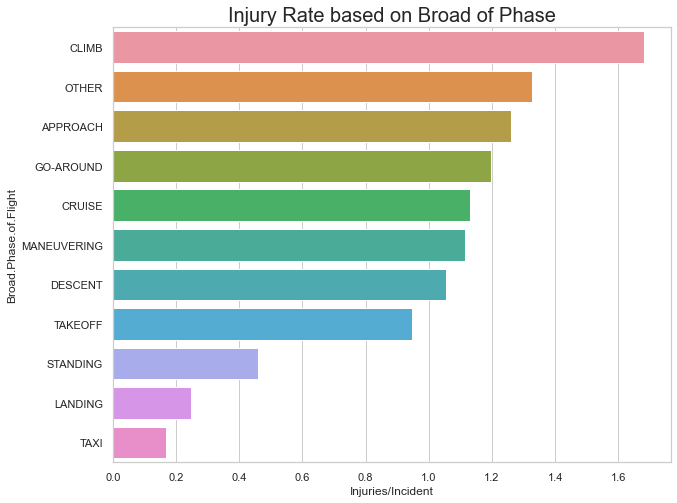

In [59]:
plt.figure(figsize=(10,8))
plt.title("Injury Rate based on Broad of Phase", fontdict = {'fontsize':20})
sb.set(style="whitegrid")
ax = sb.barplot(x="Injuries/Incident", y="Broad.Phase.of.Flight", data=bopTI_grp)
plt.show()

### 5. Total Injuries based on Aircraft Damage

In [48]:
adframes = [remake["Aircraft.Damage"],remake["Total.Injured"],remake["Total.Uninjured"],\
         remake["Total.Passenger"]]
adTI_data = pd.concat(adframes, axis=1)
adTI_grp = adTI_data.groupby(["Aircraft.Damage"]).sum()
adTI_grp = adTI_grp.sort_values("Total.Injured",ascending=False)
adTI_grp = adTI_grp.reset_index()
 
countab = []
injurytab = []
            
#Some function to callout number of incidents reported
ct = pd.DataFrame(remake["Aircraft.Damage"].value_counts().rename_axis('AD').reset_index(name='Counts'))
def g(x):
    for i in range(len(ct)):
        if adTI_grp["Aircraft.Damage"][x] == ct["AD"][i]:
            return ct["Counts"][i]
            break
            
for x in range(len(adTI_grp)):
    countab.append(g(x))
    injurytab.append(adTI_grp["Total.Injured"][x]/float(countab[x]))

adTI_grp["No.Incidents"] = countab  
adTI_grp["Injuries/Incident"] = injurytab

adTI_grp = adTI_grp.sort_values("Injuries/Incident",ascending=False)
adTI_grp = adTI_grp.reset_index()
adTI_grp = adTI_grp.drop(["index"],axis=1)

print("Total data is:", adTI_grp["No.Incidents"].sum())

adTI_grp

Total data is: 50981


Aircraft.Damage  Total.Injured  Total.Uninjured  Total.Passenger  \
0       Destroyed        22433.0           3408.0          25841.0   
1     Substantial        19522.0          76877.0          96399.0   
2           Minor          489.0          40987.0          41476.0   

   No.Incidents  Injuries/Incident  
0         10826           2.072141  
1         39091           0.499399  
2          1064           0.459586

## E. Explore Aircraft Model

### Model Incident Report

In [49]:
for x in range(len(m)):
    print(m[x])
    print("Number of Models:", len(split_make[x]["Model"].unique()))
    print(split_make[x]["Model"].value_counts().nlargest(3))
    print("Total data:", split_make[x]["Model"].count() + 1)
    print()

Cessna
Number of Models: 744
152     2253
172     1419
172N    1075
Name: Model, dtype: int64
Total data: 23954

Mooney
Number of Models: 75
M20J    249
M20C    182
M20F    146
Name: Model, dtype: int64
Total data: 1184

Piper
Number of Models: 629
PA-28-140    865
PA-18        558
PA-28-180    532
Name: Model, dtype: int64
Total data: 13075

Bell
Number of Models: 358
206B      417
7GCBC     176
17-30A    122
Name: Model, dtype: int64
Total data: 3040

Beech
Number of Models: 492
A36    348
58     205
C23    175
Name: Model, dtype: int64
Total data: 4643

Grumman
Number of Models: 112
G-164A    421
G-164B    271
G-164     103
Name: Model, dtype: int64
Total data: 1538

Robinson
Number of Models: 73
R22         189
R44         147
R22 BETA    143
Name: Model, dtype: int64
Total data: 1112

Air Tractor
Number of Models: 62
AT-301    172
AT-401     71
AT-502     64
Name: Model, dtype: int64
Total data: 749

Boeing
Number of Models: 288
A75N1    117
B75N1     45
E75       39
Name: Model, 

Take a note of Boeing E75 Embraer 75 Alaska Airlines!

### Model and Total Injuries

#### Sorted based on Total Injured

In [50]:
modframes = [remake["Model"],remake["Total.Injured"],remake["Total.Uninjured"],\
         remake["Total.Passenger"]]
modTI_data = pd.concat(modframes, axis=1)
modTI_grp = modTI_data.groupby(["Model"]).sum()
modTI_grp = modTI_grp.sort_values("Total.Injured", ascending = False)
modTI_grp = modTI_grp.reset_index()
modTI_grp = modTI_grp[:10]
 
maketab = []
countab = []
injurytab = []

#Some function to callout Make of Model
def f(x):
    for i in range(len(remake)):
        if modTI_grp["Model"][x] == remake["Model"].iloc[i]:
            return remake["Make"].iloc[i]
            break
            
#Some function to callout number of incidents reported
ct = pd.DataFrame(remake["Model"].value_counts().rename_axis('Model').reset_index(name='Counts'))
def g(x):
    for i in range(len(ct)):
        if modTI_grp["Model"][x] == ct["Model"][i]:
            return ct["Counts"][i]
            break
            
for x in range(len(modTI_grp)):
    maketab.append(f(x))
    countab.append(g(x))
    injurytab.append(modTI_grp["Total.Injured"][x]/float(countab[x]))

modTI_grp["No.Incidents"] = countab  
modTI_grp["Injuries/Incident"] = injurytab
modTI_grp["Make"] = maketab

modTI_grp

Model  Total.Injured  Total.Uninjured  Total.Passenger  No.Incidents  \
0        152          936.0           2284.0           3220.0          2253   
1  PA-28-140          927.0            783.0           1710.0           865   
2       172N          880.0           1275.0           2155.0          1075   
3        172          769.0           1996.0           2765.0          1419   
4  PA-28-181          619.0            592.0           1211.0           482   
5       172M          602.0            902.0           1504.0           726   
6  PA-28-180          574.0            560.0           1134.0           532   
7       172P          522.0            739.0           1261.0           643   
8       206B          469.0            506.0            975.0           419   
9        A36          450.0            397.0            847.0           348   

   Injuries/Incident    Make  
0           0.415446  Cessna  
1           1.071676   Piper  
2           0.818605  Cessna  
3           0.541931  Cessna  
4           1.284232   Piper  
5           0.829201  Cessna  
6           1.078947   Piper  
7           0.811820  Cessna  
8           1.119332    Bell  
9           1.293103   Beech

#### Sorted based on Injury Rate

In [51]:
modframes = [remake["Model"],remake["Total.Injured"],remake["Total.Uninjured"],\
         remake["Total.Passenger"]]
modTI_data = pd.concat(modframes, axis=1)
modTI_grp = modTI_data.groupby(["Model"]).sum()
modTI_grp = modTI_grp.sort_values("Total.Injured",ascending=False)
modTI_grp = modTI_grp.reset_index()
modTI_grp = modTI_grp[:75]
 
maketab = []
countab = []
injurytab = []

#Some function to callout Make of Model
def f(x):
    for i in range(len(remake)):
        if modTI_grp["Model"][x] == remake["Model"].iloc[i]:
            return remake["Make"].iloc[i]
            break
            
#Some function to callout number of incidents reported
ct = pd.DataFrame(remake["Model"].value_counts().rename_axis('Model').reset_index(name='Counts'))
def g(x):
    for i in range(len(ct)):
        if modTI_grp["Model"][x] == ct["Model"][i]:
            return ct["Counts"][i]
            break
            
for x in range(len(modTI_grp)):
    maketab.append(f(x))
    countab.append(g(x))
    injurytab.append(modTI_grp["Total.Injured"][x]/float(countab[x]))

modTI_grp["No.Incidents"] = countab  
modTI_grp["Injuries/Incident"] = injurytab
modTI_grp["Make"] = maketab

modTI_grp = modTI_grp.sort_values("Injuries/Incident",ascending=False)
modTI_grp = modTI_grp.reset_index()
modTI_grp = modTI_grp[:10]
modTI_grp = modTI_grp.drop(["index"],axis=1)

modTI_grp

Model  Total.Injured  Total.Uninjured  Total.Passenger  No.Incidents  \
0  777-200ER          190.0            117.0            307.0             1   
1    747-131          230.0            554.0            784.0             3   
2  B-737-300          132.0            134.0            266.0             2   
3    727-235          168.0             78.0            246.0             3   
4   707-321B          164.0              3.0            167.0             4   
5    737-300          134.0           1898.0           2032.0            19   
6      A36TC          131.0             62.0            193.0            72   
7     206L-1          196.0            163.0            359.0           121   
8  PA-32-260          304.0            263.0            567.0           191   
9       421C          177.0            283.0            460.0           112   

   Injuries/Incident    Make  
0         190.000000  Boeing  
1          76.666667  Boeing  
2          66.000000  Boeing  
3          56.000000  Boeing  
4          41.000000  Boeing  
5           7.052632  Boeing  
6           1.819444   Beech  
7           1.619835    Bell  
8           1.591623   Piper  
9           1.580357  Cessna

#### Sorted based on Injury Rate (ONLY Small Planes)

In [52]:
modframes = [remake["Model"],remake["Total.Injured"],remake["Total.Uninjured"],\
         remake["Total.Passenger"]]
modTI_data = pd.concat(modframes, axis=1)
modTI_grp = modTI_data.groupby(["Model"]).sum()
modTI_grp = modTI_grp.sort_values("Total.Injured",ascending=False)
modTI_grp = modTI_grp.reset_index()
modTI_grp = modTI_grp[:75]
 
maketab = []
countab = []
injurytab = []

#Some function to callout Make of Model
def f(x):
    for i in range(len(remake)):
        if modTI_grp["Model"][x] == remake["Model"].iloc[i]:
            return remake["Make"].iloc[i]
            break
            
#Some function to callout number of incidents reported
ct = pd.DataFrame(remake["Model"].value_counts().rename_axis('Model').reset_index(name='Counts'))
def g(x):
    for i in range(len(ct)):
        if modTI_grp["Model"][x] == ct["Model"][i]:
            return ct["Counts"][i]
            break
            
for x in range(len(modTI_grp)):
    maketab.append(f(x))
    countab.append(g(x))
    injurytab.append(modTI_grp["Total.Injured"][x]/float(countab[x]))

modTI_grp["No.Incidents"] = countab  
modTI_grp["Injuries/Incident"] = injurytab
modTI_grp["Make"] = maketab

modTI_grp = modTI_grp.sort_values("Injuries/Incident",ascending=False)
modTI_grp = modTI_grp[modTI_grp["Make"] != "Boeing"]
modTI_grp = modTI_grp.reset_index()
modTI_grp = modTI_grp[:16]
modTI_grp = modTI_grp.drop(["index"],axis=1)

modTI_grp

Model  Total.Injured  Total.Uninjured  Total.Passenger  No.Incidents  \
0        A36TC          131.0             62.0            193.0            72   
1       206L-1          196.0            163.0            359.0           121   
2    PA-32-260          304.0            263.0            567.0           191   
3         421C          177.0            283.0            460.0           112   
4        U206G          132.0            116.0            248.0            89   
5         421B          133.0            293.0            426.0            92   
6   PA-32R-300          221.0            182.0            403.0           156   
7        T210L          225.0            149.0            374.0           160   
8        P210N          214.0            122.0            336.0           161   
9          A36          450.0            397.0            847.0           348   
10   PA-28-181          619.0            592.0           1211.0           482   
11   PA-32-300          404.0            502.0            906.0           319   
12       T210N          273.0            302.0            575.0           225   
13   PA-31-350          264.0            487.0            751.0           232   
14        206B          469.0            506.0            975.0           419   
15        M20F          159.0            147.0            306.0           146   

    Injuries/Incident    Make  
0            1.819444   Beech  
1            1.619835    Bell  
2            1.591623   Piper  
3            1.580357  Cessna  
4            1.483146  Cessna  
5            1.445652  Cessna  
6            1.416667   Piper  
7            1.406250  Cessna  
8            1.329193  Cessna  
9            1.293103   Beech  
10           1.284232   Piper  
11           1.266458   Piper  
12           1.213333  Cessna  
13           1.137931   Piper  
14           1.119332    Bell  
15           1.089041  Mooney

## F. Explore Number of Engine

In [53]:
print(remake["Number.of.Engines"].unique())

[1. 2. 4. 3. 0.]


Number of Engine Types: 5
1.0    44615
2.0     6103
3.0      154
4.0      105
0.0        4
Name: Number.of.Engines, dtype: int64
Total data: 50982


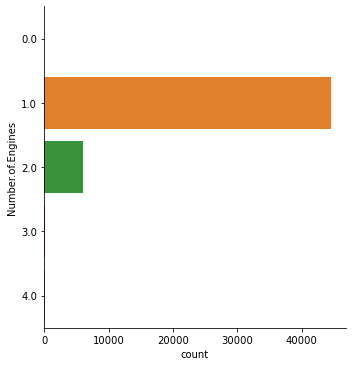

In [54]:
print("Number of Engine Types:", len(remake["Number.of.Engines"].unique()))

print(remake["Number.of.Engines"].value_counts())
print("Total data:", remake["Number.of.Engines"].count() + 1)
sb.catplot(y = "Number.of.Engines", data = remake, kind = "count")

In [55]:
noeframes = [remake["Number.of.Engines"],remake["Total.Injured"],remake["Total.Uninjured"],\
         remake["Total.Passenger"]]
noeTI_data = pd.concat(noeframes, axis=1)

noeTI_grp = noeTI_data.groupby(["Number.of.Engines"]).sum()
noeTI_grp = noeTI_grp.sort_values("Total.Injured",ascending=False)
noeTI_grp = noeTI_grp.reset_index()

countab = []
injurytab = []

#Some function to callout number of incidents reported
ct = pd.DataFrame(remake["Number.of.Engines"].value_counts().rename_axis('NOE').reset_index(name='Counts'))
def g(x):
    for i in range(len(ct)):
        if noeTI_grp["Number.of.Engines"][x] == ct["NOE"][i]:
            return ct["Counts"][i]
            break
            
for x in range(len(noeTI_grp)):
    countab.append(g(x))
    injurytab.append(noeTI_grp["Total.Injured"][x]/float(countab[x]))

noeTI_grp["No.Incidents"] = countab  
noeTI_grp["Injuries/Incident"] = injurytab

noeTI_grp = noeTI_grp.sort_values("Injuries/Incident",ascending=False)
noeTI_grp = noeTI_grp.reset_index()
noeTI_grp = noeTI_grp.drop(["index"],axis=1)

noeTI_grp

Number.of.Engines  Total.Injured  Total.Uninjured  Total.Passenger  \
0                4.0          611.0          15226.0          15837.0   
1                3.0          481.0          12587.0          13068.0   
2                2.0         7623.0          42793.0          50416.0   
3                1.0        33727.0          50662.0          84389.0   
4                0.0            2.0              4.0              6.0   

   No.Incidents  Injuries/Incident  
0           105           5.819048  
1           154           3.123377  
2          6103           1.249058  
3         44615           0.755957  
4             4           0.500000

## G. Explore Amateur Built

In [56]:
print(remake["Amateur.Built"].unique())

['No' 'Yes']


No     50778
Yes      203
Name: Amateur.Built, dtype: int64
Total data: 50982


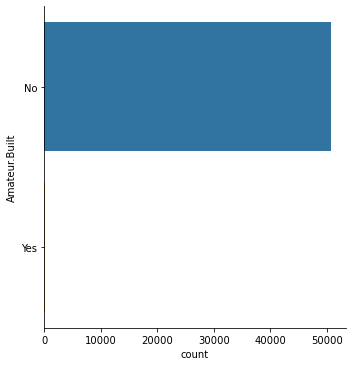

In [57]:
print(remake["Amateur.Built"].value_counts())
print("Total data:", remake["Amateur.Built"].count() + 1)
sb.catplot(y = "Amateur.Built", data = remake, kind = "count")

In [58]:
abframes = [remake["Amateur.Built"],remake["Total.Injured"],remake["Total.Uninjured"],\
         remake["Total.Passenger"]]
abTI_data = pd.concat(abframes, axis=1)

abTI_grp = abTI_data.groupby(["Amateur.Built"]).sum()
abTI_grp = abTI_grp.sort_values("Total.Injured",ascending=False)
abTI_grp = abTI_grp.reset_index()

countab = []
injurytab = []

#Some function to callout number of incidents reported
ct = pd.DataFrame(remake["Amateur.Built"].value_counts().rename_axis('AB').reset_index(name='Counts'))
def g(x):
    for i in range(len(ct)):
        if abTI_grp["Amateur.Built"][x] == ct["AB"][i]:
            return ct["Counts"][i]
            break
            
for x in range(len(abTI_grp)):
    countab.append(g(x))
    injurytab.append(abTI_grp["Total.Injured"][x]/float(countab[x]))

abTI_grp["No.Incidents"] = countab  
abTI_grp["Injuries/Incident"] = injurytab

abTI_grp = abTI_grp.sort_values("Injuries/Incident",ascending=False)
abTI_grp = abTI_grp.reset_index()
abTI_grp = abTI_grp.drop(["index"],axis=1)

abTI_grp

Amateur.Built  Total.Injured  Total.Uninjured  Total.Passenger  \
0           Yes          185.0            182.0            367.0   
1            No        42259.0         121090.0         163349.0   

   No.Incidents  Injuries/Incident  
0           203            0.91133  
1         50778            0.83223

## Continue Classification on Separate Book

In [59]:
data_clean = pd.DataFrame(remake)
data_clean.head()

Year Division Aircraft.Damage    Make   Model Amateur.Built  \
0   2019      PAC     Substantial  Cessna     175            No   
1   2019      PAC       Destroyed  Mooney    M20S            No   
5   2019      WNC       Destroyed   Piper  PA 31T            No   
6   2019      WSC     Substantial    Bell     407            No   
14  2019      ESC     Substantial  Cessna     172            No   

    Number.of.Engines  Total.Uninjured  Total.Injured  Total.Passenger  \
0                 1.0              1.0            0.0              1.0   
1                 1.0              2.0            2.0              4.0   
5                 2.0              0.0            9.0              9.0   
6                 1.0              2.0            1.0              3.0   
14                1.0              2.0            0.0              2.0   

   Weather.Condition Broad.Phase.of.Flight  
0                VMC               TAKEOFF  
1                VMC               TAKEOFF  
5                IMC               TAKEOFF  
6                VMC              APPROACH  
14               VMC               LANDING

In [60]:
data_clean.describe()

Year  Number.of.Engines  Total.Uninjured  Total.Injured  \
count  50981.000000       50981.000000     50981.000000   50981.000000   
mean    1995.668818           1.131853         2.378769       0.832545   
std       10.289829           0.364728        15.997651       2.382324   
min     1962.000000           0.000000         0.000000       0.000000   
25%     1987.000000           1.000000         0.000000       0.000000   
50%     1994.000000           1.000000         1.000000       0.000000   
75%     2003.000000           1.000000         2.000000       1.000000   
max     2019.000000           4.000000       699.000000     230.000000   

       Total.Passenger  
count     50981.000000  
mean          3.211314  
std          16.257191  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           2.000000  
max         699.000000

In [61]:
data_clean.to_csv("DataClass/data_clean.csv", index=False)